# Data Science Project
Author : **Osvaldo Figo**

# Import Library for Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as ss

%matplotlib inline
sns.set(style='darkgrid') #To make the plot's axis shown

# Import Dataset

In [788]:
df = pd.read_excel("ClinicACov.xlsx")
pd.options.display.max_columns = 13
df.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,PromoCode,GrandTotal,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative
1,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Negative
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Positive
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,-,199000,0,2850,201850,2021-05-04 21:35:10,Negative


# Problem Statement
Sudah dua tahun berlalu dan berbagai cara telah dilakukan untuk mengatasi wabah **Covid-19** yang melanda seluruh dunia. Pemerintah Indonesia sudah melakukan berbagai upaya preventif dan kuratif agar masalah ini cepat terselesaikan. Pemerintah telah menyiapkan sarana untuk mendeteksi Covid-19 dengan menyediakan berbagai macam tes dengan tingkat keakuratan yang berbeda-beda berdasarkan jenisnya. Namun, ada biaya yang harus dikeluarkan oleh masyarakat untuk melakukan tes dan kurangnya sosialisasi kepada masyarakat kerap membuat masyarakat enggan untuk melakukan tes dan menganggap enteng wabah yang sedang terjadi. Oleh karena itu, akan dicari tahu berapa kira-kira uang yang rela dikeluarkan oleh masyarakat untuk melakukan tes Covid-19 serta berbagai _insight_ lain yang nantinya akan dicari tahu dalam project ini.

Tujuan selanjutnya adalah membuat model untuk memprediksi **harga** yang cocok dan berapa **diskon** yang harus diberikan kepada pasien berdasarkan atribut-atribut yang ada. Modeling ini bertujuan untuk mendapatkan harga terbaik dan promo menarik yang dapat diberikan kepada pasien yang datang untuk melakukan tes, sehingga frekuensi orang untuk melakukan tes diharapkan dapat bertambah. Modeling ini juga bermanfaat untuk mengurangi waktu menganaisis pasien secara manual untuk menentukan harga dan promo apa yang dapat diberikan.

> **Swab PCR** mencari material genetik pada virus corona yang menyebabkan Covid-19

> **Swab Antigen** hanya mencari protein yang terdapat di permukaan virus dan kerap memberikan hasil **False Negative** dan **False Positive**

# Deskripsi Kolom
- TrxNumber = Nomor transaksi
- TrxType = Tipe transaksi
- Branch = Cabang Perusahaan
- Package = Paket yang disediakan ClinicACov (Swab PCR atau Antigen)
- PatientBirthDate = Tanggal lahir Pasien
- PatientGender = Gender dari Pasien
- VoucherCode = Kode voucher yang digunakan
- GrandTotal = Biaya Tes
- TotalDiscount = Potongan harga yang diberikan
- AdminFee = Biaya administrasi
- Total Amount = Biaya total yang harus dibayarkan
- OrderCreated = Tanggal Order
- MedicalResult = Hasil medical (Positive atau Negative Covid)

# Data Cleaning

In [789]:
# Melihat informasi tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   object        
 2   Branch            1000 non-null   object        
 3   Package           1000 non-null   object        
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   object        
 6   PromoCode         1000 non-null   object        
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   int64         
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   object        
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 101.7+ KB


In [790]:
# Melihat total baris dan kolom data
df.shape

(1000, 13)

In [791]:
# Mencari duplicated data
df[df.duplicated()]

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,PromoCode,GrandTotal,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult
1,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative
6,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-10-17,m,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative
7,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-10-17,m,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative
8,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-10-17,m,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative
10,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-11-08,f,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative
11,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-11-08,f,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative
12,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-11-08,f,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative
14,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,2005-12-12,f,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative
15,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,2005-12-12,f,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative
16,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,2005-12-12,f,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative


Ada 592 data yang terduplikat, namun akan tetap dipakai karena keterbatasan data yang hanya memiliki 1000 row, sehingga model yang dibentuk nantinya dapat mendapatkan input yang lebih banyak sehingga tidak terjadi overfitting.

In [792]:
# Mencari Missing Values
df.isna().sum()

TrxNumber           0
TrxType             0
Branch              0
Package             0
PatientBirthDate    0
PatientGender       0
PromoCode           0
GrandTotal          0
TotalDiscount       0
AdminFee            0
TotalAmount         0
OrderCreated        0
MedicalResult       0
dtype: int64

Dapat dilihat bahwa tidak ada data yang kosong

In [793]:
# Akan dilakukan penambahan kolom umur
born = pd.to_datetime(df['PatientBirthDate'])
now = pd.to_datetime(df['OrderCreated'])

df['Age'] = now-born #just to make a column
for i in range(len(df)):
    df['Age'].iloc[i] = pd.Timedelta(now[i]-born[i]).days/365

# Checking the new "Age" column
pd.set_option('display.max_rows',None)

df['Age'].astype(float)
df['Age'] = df['Age'].apply(np.round)

Akan dibagi kelompok umur seperti apa yang dilakukan **pemerintah Indonesia** menjadi:
- 0-5 tahun
- 6-18 tahun
- 19-30 tahun
- 31-45 tahun
- 46-59 tahun
- Lebih dari 60 tahun

In [794]:
def recat_y(x) :
    '''
    recat_y = fungsi yg digunakan untuk re-kategori isi dari kolom yang nantinya akan di 
              apply kepada fungsi ini
    x = parameter dari fungsi recat_y, yang nantinya adalah nama kolom yang akan di apply
        fungsi ini
    '''
    if x >= 0 and x <= 5:
        return 0
    elif x >= 6 and x <= 18:
        return 1
    elif x >= 19 and x <= 30:
        return 2
    elif x >= 31 and x <= 45:
        return 3
    elif x >= 46 and x <= 59:
        return 4
    elif x >= 60:
        return 5
    
df['Age'] = df['Age'].apply(recat_y)
df.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,...,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult,Age
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,...,0,3000,202000,2021-05-04 10:01:11,Negative,2
1,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,...,0,3000,202000,2021-05-04 10:01:11,Negative,2
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,...,0,3000,202000,2021-05-04 11:51:14,Negative,2
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,...,0,3000,202000,2021-05-04 11:51:14,Positive,2
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,...,0,2850,201850,2021-05-04 21:35:10,Negative,3


In [795]:
df['Age'] = df['Age'].astype(str)

In [796]:
# Akan dilakukan penambahan kolom bulan
df['month'] = pd.DatetimeIndex(df['OrderCreated']).month
df['date'] = pd.DatetimeIndex(df['OrderCreated']).day
df.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,...,TotalAmount,OrderCreated,MedicalResult,Age,month,date
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,...,202000,2021-05-04 10:01:11,Negative,2,5,4
1,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,...,202000,2021-05-04 10:01:11,Negative,2,5,4
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,...,202000,2021-05-04 11:51:14,Negative,2,5,4
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,...,202000,2021-05-04 11:51:14,Positive,2,5,4
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,...,201850,2021-05-04 21:35:10,Negative,3,5,4


In [797]:
# Analisis deskriptif untuk variabel numerik
round(df.describe().T, ndigits = 2)

,count,mean,std,min,25%,50%,75%,max
TrxNumber,1000.0,1.400462e+18,5.940340e+15,1.388025e+18,1.395276e+18,1.398494e+18,1.406808e+18,1.406998e+18
GrandTotal,1000.0,7.662540e+05,7.264953e+05,1.990000e+05,3.980000e+05,5.970000e+05,7.960000e+05,3.596000e+06
TotalDiscount,1000.0,3.718650e+03,2.902643e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+05
AdminFee,1000.0,3.632630e+03,4.236160e+03,0.000000e+00,2.850000e+03,2.850000e+03,2.850000e+03,2.625000e+04
TotalAmount,1000.0,7.661680e+05,7.263984e+05,1.720000e+05,4.008500e+05,5.998500e+05,8.204770e+05,3.598850e+06
month,1000.0,5.480000e+00,5.000000e-01,4.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00
date,1000.0,1.959000e+01,6.120000e+00,1.000000e+00,1.800000e+01,2.100000e+01,2.100000e+01,3.000000e+01


In [798]:
# Analisis deskriptif untuk variabel kategorikal
df.describe(include=['object']).T

,count,unique,top,freq
TrxType,1000,2,on ClinicACov stand,940
Branch,1000,8,ClinicACov Cikarang Pusat,707
Package,1000,4,Swab Antigen on ClinicACov stand (Result in 30...,852
PatientGender,1000,2,m,513
PromoCode,1000,3,-,967
MedicalResult,1000,2,Negative,927
Age,1000,6,3,388


### Exploratory Data Analysis & INSIGHTS

**QUESTION:** Lihat sebaran kelompok umur yang paling banyak melakukan tes!

<AxesSubplot:>

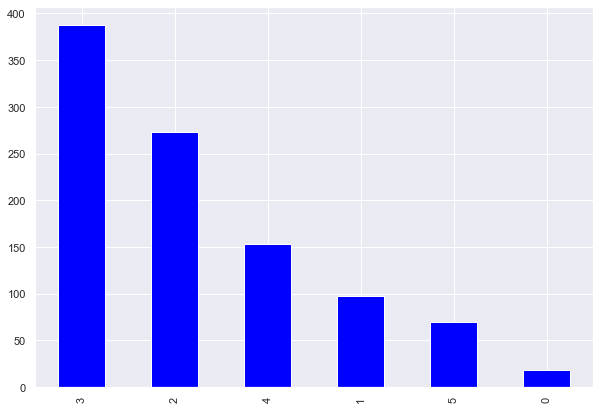

In [799]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,7))
df.Age.value_counts().plot(kind="bar", color = ['Blue'])

In [800]:
df.Age.value_counts()

3    388
2    273
4    153
1     98
5     70
0     18
Name: Age, dtype: int64

Dari gambar di atas dapat dilihat bahwa kelompok umur yang paling banyak melakukan tes pcr adalah kelompok umur di antara 31-45 tahun

**QUESTION:** Berapa jumlah uang yang dikeluarkan dengan frekuensi tertinggi dan rata-rata uang yang dikeluarkan untuk melakukan tes?

In [801]:
# Melihat rata-rata
df.TotalAmount.mean()

766167.981

<AxesSubplot:>

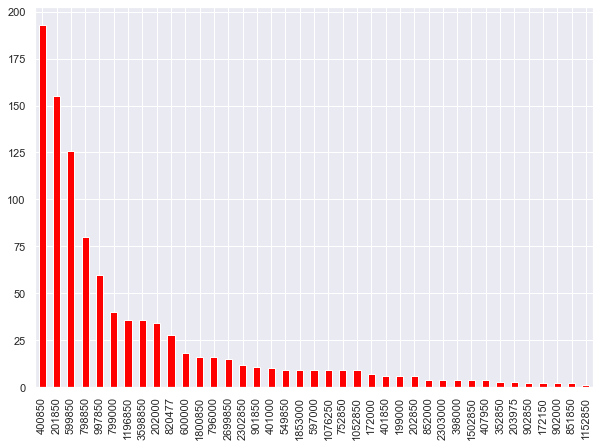

In [802]:
# Melihat Total Amount yang paling banyak dikeluarkan
sns.set(style='darkgrid')
plt.figure(figsize=(10,7))
df.TotalAmount.value_counts().plot(kind="bar", color = ['Red'])

Orang-orang paling banyak mengambil opsi untuk mengeluarkan uang sebesar **400850** rupiah untuk melakukan tes. Diikuti tes dengan nominal **201850** dan **599850**

**QUESTION:** Tes jenis apa yang diambil dengan nominal 400850, 201850, dan 599850?

In [803]:
tipe = df[['TotalAmount','Package']]
tipetes = tipe[tipe['TotalAmount'] == 400850]
tipetes['Package'].unique()

array(['Swab Antigen on ClinicACov stand (Result in 30Minutes)'],
      dtype=object)

Tes yang paling banyak diambil oleh masyarakat adalah **Swab Antigen on ClinicACov stand (Result in 30Minutes)**

In [804]:
tipe = df[['TotalAmount','Package']]
tipetes = tipe[tipe['TotalAmount'] == 201850]
print('Tipe tes untuk Total Amount 201850 adalah ' + tipetes['Package'].unique())

tipe = df[['TotalAmount','Package']]
tipetes = tipe[tipe['TotalAmount'] == 599850]
print('Tipe tes untuk Total Amount 599850 adalah ' + tipetes['Package'].unique())

['Tipe tes untuk Total Amount 201850 adalah Swab Antigen on ClinicACov stand (Result in 30Minutes)']
['Tipe tes untuk Total Amount 599850 adalah Swab Antigen on ClinicACov stand (Result in 30Minutes)']


Dapat dilihat bahwa masyarakat memiliki kecenderungan untuk mengambil tes **Swab Antigen on ClinicACov stand (Result in 30Minutes)**

**QUESTION:** Mengapa ada perbedaan Total Pembayaran jika melakuka tes yang sama?

In [805]:
# Akan dilihat Total Amount unique untuk tes Swab Antigen on ClinicACov stand
swabantigen = tipe[tipe['Package'] == 'Swab Antigen on ClinicACov stand (Result in 30Minutes)']
swabantigen['TotalAmount'].value_counts()

400850     193
201850     155
599850     126
798850      80
997850      60
799000      40
1196850     36
202000      34
820477      28
600000      18
796000      16
401000      10
597000       9
549850       9
172000       7
401850       6
202850       6
199000       6
398000       4
407950       4
203975       3
172150       2
Name: TotalAmount, dtype: int64

Ternyata ada sangat banyak variasi biaya yang dikeluarkan masyarakat dalam melakukan Swab Antigen

In [806]:
antigen = df[df['Package'] == 'Swab Antigen on ClinicACov stand (Result in 30Minutes)']
grup = antigen.groupby('TotalAmount').sum()
grup

,TrxNumber,GrandTotal,TotalDiscount,AdminFee,month,date
TotalAmount,,,,,,
172000,9.847871e+18,1393000.0,208950.0,19950.0,42.0,147.0
172150,2.813727e+18,398000.0,59700.0,6000.0,12.0,42.0
199000,8.441275e+18,1194000.0,0.0,0.0,36.0,126.0
201850,2.168180e+20,30845000.0,0.0,441750.0,833.0,2836.0
202000,4.751941e+19,6766000.0,0.0,102000.0,182.0,534.0
202850,8.387353e+18,1195000.0,0.0,22100.0,31.0,132.0
203975,4.187976e+18,597000.0,0.0,14925.0,15.0,66.0
398000,5.627497e+18,1592000.0,0.0,0.0,24.0,84.0
400850,2.706681e+20,76814000.0,0.0,550050.0,1092.0,3744.0


Ternyata keberagaman Total Amount yang dibayarkan terjadi karena ada perbedaan yang beragam pada biaya administrasi, total discount dan, Grand Total

In [807]:
print(f'Grand Total: {antigen.GrandTotal.unique()}')
print(f'Promo: {antigen.TotalDiscount.unique()}')
print(f'Biaya Admin: {antigen.AdminFee.unique()}')

Grand Total: [ 199000  796000  398000  597000  995000  200000 1194000]
Promo: [    0 29850 50000]
Biaya Admin: [ 3000  2850  3850     0 24477  4975  9950]


Akan dilihat juga ada berapa benyak beda Total Amount pembayaran pada tes lainnya (selain Antigen Stand)

In [808]:
others = df[df['Package'] != 'Swab Antigen on ClinicACov stand (Result in 30Minutes)']
others['TotalAmount'].value_counts()

3598850    36
1800850    16
2699850    15
2302850    12
901850     11
1853000     9
1052850     9
1076250     9
752850      9
2303000     4
852000      4
1502850     4
352850      3
902000      2
851850      2
902850      2
1152850     1
Name: TotalAmount, dtype: int64

Ternyata pada tes lain pun terhadap perbedaan uang yang dikeluarkan untuk melakukan tes dan diasumsikan memiliki sebab yang sama dengan tes Antigen Stand

**QUESTION:** Apa penyebab perbedaan Grand Total, discount, dan Biaya Admin? Apakah karena klinik yang berbeda?

In [809]:
df.columns

Index(['TrxNumber', 'TrxType', 'Branch', 'Package', 'PatientBirthDate',
       'PatientGender', 'PromoCode', 'GrandTotal', 'TotalDiscount', 'AdminFee',
       'TotalAmount', 'OrderCreated', 'MedicalResult', 'Age', 'month', 'date'],
      dtype='object')

In [810]:
df['Branch'].unique()

array(['ClinicACov Cikarang Selatan', 'ClinicACov Cikarang Pusat',
       'ClinicACov Cileungsi', 'ClinicACov Bekasi Timur',
       'ClinicACov Bekasi Selatan', 'ClinicACov Margonda',
       'ClinicACov Cibubur', 'ClinicACov Cikarang Utara'], dtype=object)

In [811]:
ans = df[['Branch','GrandTotal','TotalDiscount','AdminFee','TotalAmount','Package']]
ans.head()

,Branch,GrandTotal,TotalDiscount,AdminFee,TotalAmount,Package
0,ClinicACov Cikarang Selatan,199000,0,3000,202000,Swab Antigen on ClinicACov stand (Result in 30...
1,ClinicACov Cikarang Selatan,199000,0,3000,202000,Swab Antigen on ClinicACov stand (Result in 30...
2,ClinicACov Cikarang Selatan,199000,0,3000,202000,Swab Antigen on ClinicACov stand (Result in 30...
3,ClinicACov Cikarang Selatan,199000,0,3000,202000,Swab Antigen on ClinicACov stand (Result in 30...
4,ClinicACov Cikarang Selatan,199000,0,2850,201850,Swab Antigen on ClinicACov stand (Result in 30...


<AxesSubplot:>

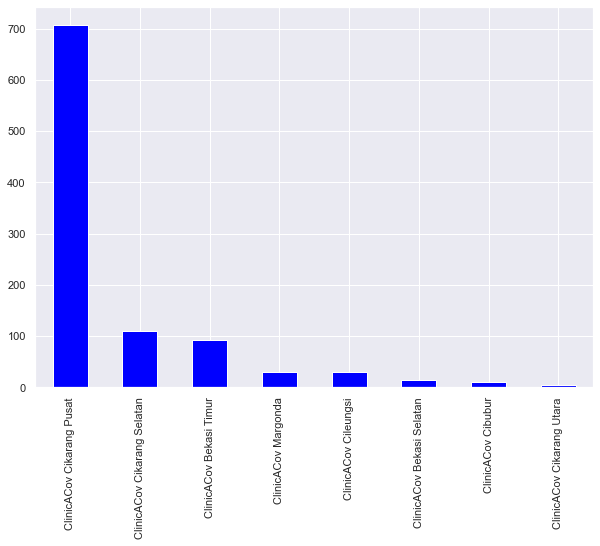

In [812]:
# Melihat plot klinik
sns.set(style='darkgrid')
plt.figure(figsize=(10,7))
ans.Branch.value_counts().plot(kind="bar", color = ['Blue'])

In [813]:
ans.Branch.value_counts()

ClinicACov Cikarang Pusat      707
ClinicACov Cikarang Selatan    111
ClinicACov Bekasi Timur         93
ClinicACov Margonda             31
ClinicACov Cileungsi            30
ClinicACov Bekasi Selatan       14
ClinicACov Cibubur              10
ClinicACov Cikarang Utara        4
Name: Branch, dtype: int64

Klinik yang paling banyak dikunjungi adalah kliinik Cikarang Pusat, dengan perbedaan yang sangat signifikan dibanding dengan klinik lain, akan dilihat apakah harga juga berbeda-beda pada hanya satu klinik

In [814]:
pusat = ans[ans['Branch'] == 'ClinicACov Cikarang Pusat']
print(f'Grand Total: {pusat.GrandTotal.unique()}')
print(f'Promo: {pusat.TotalDiscount.unique()}')
print(f'Biaya Admin: {pusat.AdminFee.unique()}')
print(f'Total Amount: {pusat.TotalAmount.unique()}')

Grand Total: [ 796000  199000  398000  597000  899000 2697000 1798000 3596000  995000
 1194000]
Promo: [    0 29850 50000]
Biaya Admin: [ 2850  3000  3850     0 24477  4975  9950]
Total Amount: [ 798850  202000  201850  400850  599850  901850 2699850 1800850  202850
  799000  902000  600000  172000 3598850  851850  852000  997850  549850
  199000  398000  796000  820477  203975 1196850  407950  401850  902850
  597000]


Ternyata tetap ada perbedaan pada harga-harga yang ada di setiap klinik, sehingga tidak ditemukan apa penyebab perbedaan harga pada tes yang sama. Kemungkinan lain adalah pada waktu tes dilakukan.

Karena metode satu-persatu memakan waktu yang lama, maka akan digunakan metode lain

**QUESTION:** Apa jumlah tipe transaksi paling banyak?

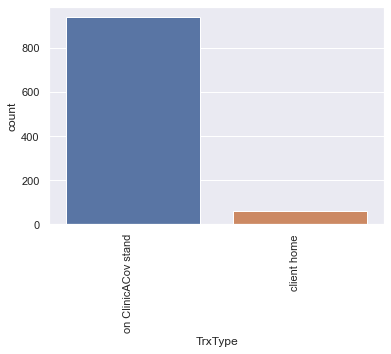

In [815]:
# Melihat plot tipe transaksi
chart = sns.countplot(df['TrxType'])

chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [816]:
df['TrxType'].value_counts()

on ClinicACov stand    940
client home             60
Name: TrxType, dtype: int64

Tes yang langsung datang ke klinik ternyata memiliki proporsi yang jauh lebih banyak dibanding tes yang dilakukan di rumah

**QUESTION:** Mana jenis kelamin yang lebih banyak melakukan tes?

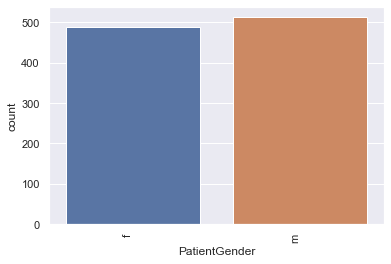

In [817]:
# Melihat plot gender pasien
chart = sns.countplot(df['PatientGender'])

chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Ternyata proporsi kedua jenis kelamin tidak memiliki perbedaan yang signifikan, hanya proporsi pria mengambil tes lebih banyak sedikit dibanding wanita

**QUESTION:** Berapa grand total dari yang terbesar hingga terkecil?

<AxesSubplot:>

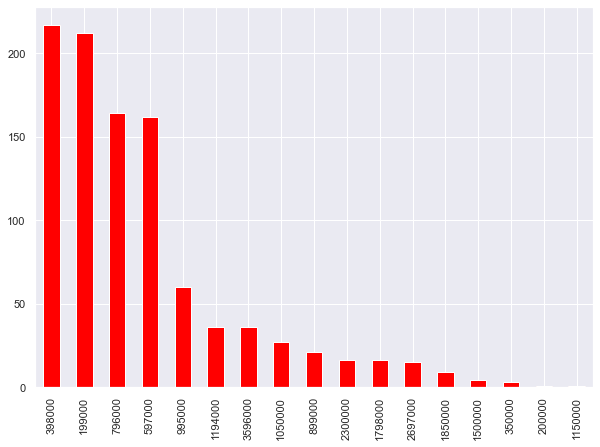

In [818]:
# Melihat plot Grand Total yang paling besar
sns.set(style='darkgrid')
plt.figure(figsize=(10,7))
df.GrandTotal.value_counts().plot(kind="bar", color = ['Red'])

**QUESTION:** berapa nominal diskon-diskon yang diberikan?

In [819]:
# Melihat TotalDiscount yang paling banyak diberikan
df.TotalDiscount.value_counts()

0         967
50000      15
29850       9
300000      9
Name: TotalDiscount, dtype: int64

**QUESTION:** Berapa biaya admin yang paling banyak yang dikeluarkan?

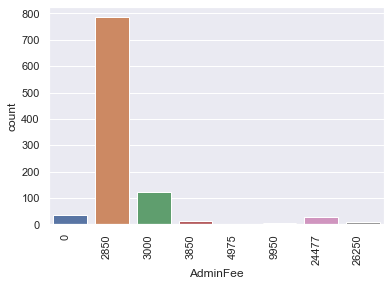

In [820]:
# Melihat plot biaya admin yang ada
chart = sns.countplot(df['AdminFee'])

chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

**QUESTION:** Berapa proporsi hasil tes pasien?

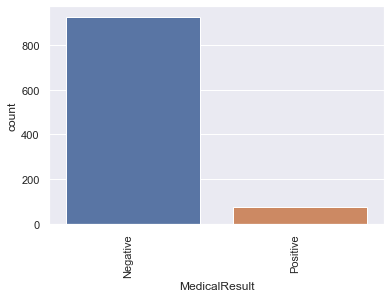

In [821]:
# Melihat plot hasil tes negatif/positif
chart = sns.countplot(df['MedicalResult'])

chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

**QUESTION:** Tampilkan kode promo dan total diskon yang diberikan!

In [822]:
cari = df[['PromoCode','TotalDiscount']]
promo = cari[cari['PromoCode'] != '-']
promo.groupby('TotalDiscount').max()

,PromoCode
TotalDiscount,
29850,CLINICACOV15
50000,CLINICACOV15
300000,ANTIGENCLINICACOVHOME3


**QUESTION:** Mana bulan yang paling ramai pasien?

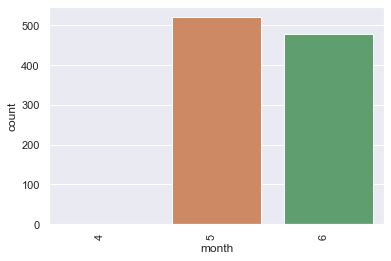

In [823]:
# Melihat plot bulan dengan frekuensi tes terbanyak
chart = sns.countplot(df['month'])

chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [824]:
df.month.value_counts()

5    521
6    478
4      1
Name: month, dtype: int64

**QUESTION:** Mana kelompok umur yang diberikan diskon paling banyak?

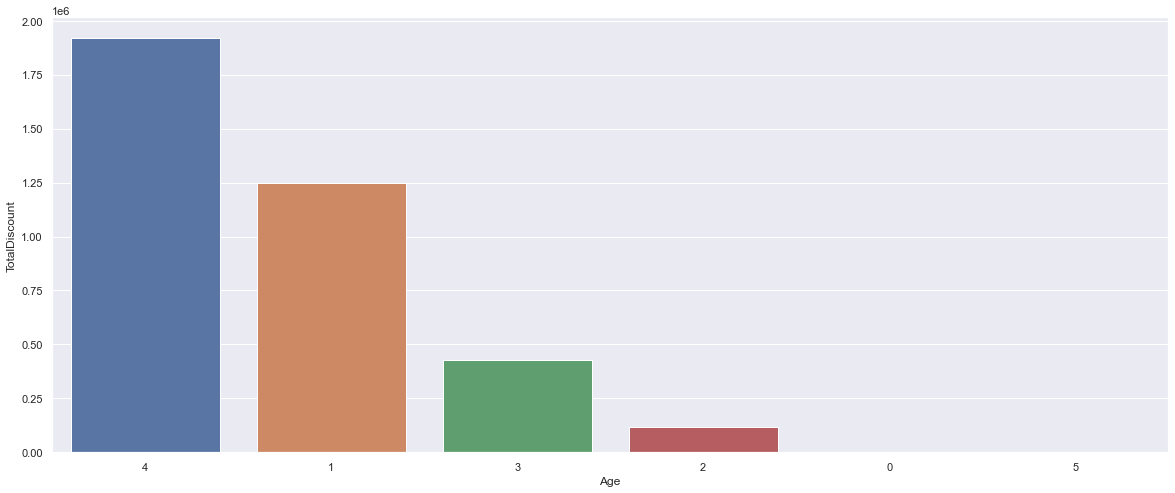

In [825]:
cat=df[["Age", "TotalDiscount"]].groupby(['Age'], as_index=False).sum().sort_values(by='TotalDiscount', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Age', y='TotalDiscount', data=cat)

plt.show()

In [837]:
df[["Age", "TotalDiscount"]].groupby(['Age'], as_index=False).sum().sort_values(by='TotalDiscount', ascending=False)

,Age,TotalDiscount
4,4,1919400
1,1,1250000
3,3,429850
2,2,119400
0,0,0
5,5,0


1. 46-59 tahun
2. 6-18 tahun
3. 31-45 tahun

**QUESTION:** Gender dengan hasil tes pasien?

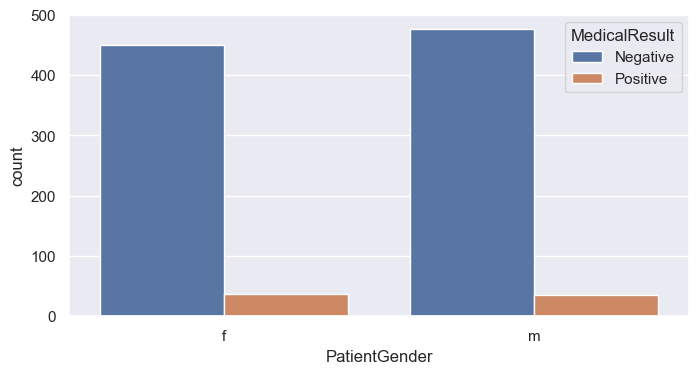

In [826]:
plt.figure(figsize=(8,4), dpi=100 )
ax = sns.countplot(x="PatientGender", hue="MedicalResult", data=df)
plt.show()

**QUESTION:** Apa kelompok umur dengan hasil tes positif tertinggi?

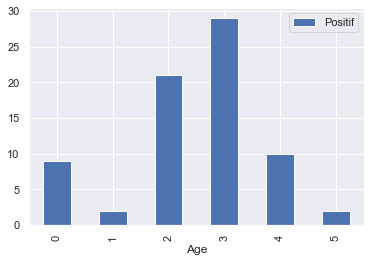

In [827]:
# Melihat plot kasus positif berdasarkan kelompok umur
pos = df[df['MedicalResult'] == 'Positive']
posAge = pos[['Age','MedicalResult']]
posAge = posAge.rename({'MedicalResult':'Positif'}, axis=1)
posAge.groupby('Age').count().plot(kind = 'bar')
plt.show()

In [828]:
# Angka jika dilihat dengan tabel
tabel_AgePos = posAge.groupby('Age', as_index=False).count()

total_ = []
for i in df['Age'].unique():
    total_.append(len(df[df['Age'] == i]))

tabel_AgePos['Total Tes'] = total_
tabel_AgePos['Persentase'] = round((tabel_AgePos['Positif']/tabel_AgePos['Total Tes'])*100,2)

tabel_AgePos

,Age,Positif,Total Tes,Persentase
0,0,9,273,3.30
1,1,2,388,0.52
2,2,21,98,21.43
3,3,29,153,18.95
4,4,10,70,14.29
5,5,2,18,11.11


Ternyata kelompok umur 31-45 tahun memiliki kasus positif tertinggi, diikuti oleh kelompok umur 19-30 tahun, dan 46-59 tahun.

**QUESTION:** Mana klinik dengan kasus positif terbanyak?

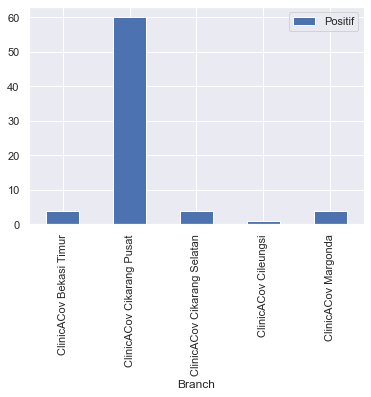

In [829]:
pos = df[df['MedicalResult'] == 'Positive']
posresult = pos[['Branch','MedicalResult']]
posresult = posresult.rename({'MedicalResult':'Positif'}, axis=1)
posresult.groupby('Branch').count().plot(kind = 'bar')
plt.show()

Kita tahu dari gambar di atas bahwa kasus positif paling banyak ada pada klinik Cikarang Pusat, hal ini tentu berbanding lurus dengan jumlah tes yang dilakukan di klinik tersebut. Mari kita lihat persentase kasus positif per jumlah tes yang dilakukan.

In [830]:
df['Branch'].unique()

array(['ClinicACov Cikarang Selatan', 'ClinicACov Cikarang Pusat',
       'ClinicACov Cileungsi', 'ClinicACov Bekasi Timur',
       'ClinicACov Bekasi Selatan', 'ClinicACov Margonda',
       'ClinicACov Cibubur', 'ClinicACov Cikarang Utara'], dtype=object)

In [831]:
# Membuat tabel positif covid untuk setiap klinik
kasus_pos = posresult.groupby('Branch', as_index=False).count()

In [832]:
branch = []
positif = []
total = []

for i in df['Branch'].unique():
    if i in kasus_pos['Branch'].tolist():
        branch.append(i)
        positif.append(kasus_pos[kasus_pos['Branch'] == i]['Positif'].values[0])
        total.append(len(df[df['Branch'] == i]))
    else:
        branch.append(i)
        positif.append(0)
        total.append(len(df[df['Branch'] == i]))
        
temp = pd.DataFrame()
temp['Branch'] = branch
temp['Positif'] = positif
temp['Total Tes'] = total

temp['Persentase'] = round((temp['Positif']/temp['Total Tes'])*100, 2)
temp

,Branch,Positif,Total Tes,Persentase
0,ClinicACov Cikarang Selatan,4,111,3.60
1,ClinicACov Cikarang Pusat,60,707,8.49
2,ClinicACov Cileungsi,1,30,3.33
3,ClinicACov Bekasi Timur,4,93,4.30
4,ClinicACov Bekasi Selatan,0,14,0.00
5,ClinicACov Margonda,4,31,12.90
6,ClinicACov Cibubur,0,10,0.00
7,ClinicACov Cikarang Utara,0,4,0.00


**QUESTION:** Mana klinik dengan diskon terbesar?

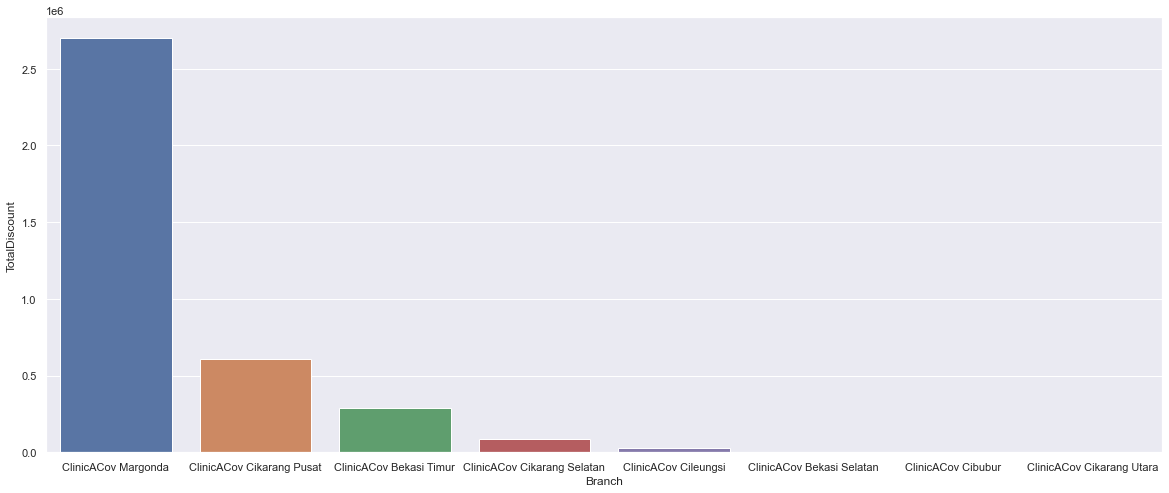

In [834]:
cat=df[["Branch", "TotalDiscount"]].groupby(['Branch'], as_index=False).sum().sort_values(by='TotalDiscount', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Branch', y='TotalDiscount', data=cat)

plt.show()

In [45]:
# Lihat menggunakan pivot table
discdata = df[df['TotalDiscount'] != 0]
pd.pivot_table(data = discdata, values = 'TotalDiscount', index = ['month','Branch'], aggfunc = ['min','mean','max','count'])

min           mean           max  \
                                  TotalDiscount  TotalDiscount TotalDiscount   
month Branch                                                                   
6     ClinicACov Bekasi Timur             29850   41364.285714         50000   
      ClinicACov Cikarang Pusat           29850   46900.000000         50000   
      ClinicACov Cikarang Selatan         29850   29850.000000         29850   
      ClinicACov Cileungsi                29850   29850.000000         29850   
      ClinicACov Margonda                300000  300000.000000        300000   

                                          count  
                                  TotalDiscount  
month Branch                                     
6     ClinicACov Bekasi Timur                 7  
      ClinicACov Cikarang Pusat              13  
      ClinicACov Cikarang Selatan             3  
      ClinicACov Cileungsi                    1  
      ClinicACov Margonda                     9

**INSIGHTS:** Dari unique diskon kita tahu bahwa diskon yang diberikan sudah dipatok dan tidak continuous, oleh karena itu akan dilihat hubungan diskon dengan variabel lain.

In [46]:
disc = df
disc['TotalDiscount'] = disc['TotalDiscount'].astype(str)
disc['TotalDiscount'].unique()

array(['0', '300000', '29850', '50000'], dtype=object)

In [47]:
disc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   object        
 2   Branch            1000 non-null   object        
 3   Package           1000 non-null   object        
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   object        
 6   PromoCode         1000 non-null   object        
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   object        
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   object        
 13  Age               1000 non-null   object        
 14  month             1000 no

Akan dicari hubungan antara variabel Age, PromoCode, PatientGender, Package, Branch, TrxType dengan Total Discount

**QUESTION:** Bagaimana korelasi antara diskon dengan variabel lain, mana yang paling berpengaruh?
1. Apa klinik yang memberikan diskon paling banyak?
2. Berapa kelompok kategori umur yang diberikan diskon paling banyak?
3. Apa jenis kelamin yang diberikan diskon paling banyak?
4. Apa jenis tes yang paling banyak mendapatkan diskon?
5. Apa tipe transaksi dengan diskon paling banyak?
6. Apa kode promo yang paling banyak dikeluarkan untuk diskon?

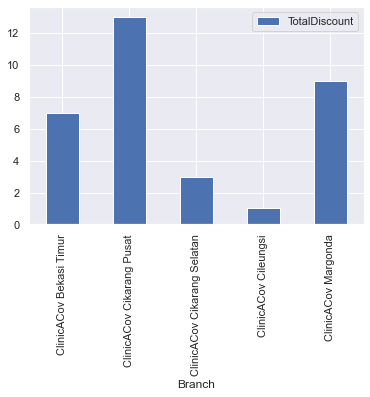

In [48]:
#1
disc = df[df['TotalDiscount'] != '0']
result = disc[['Branch','TotalDiscount']]
result.groupby('Branch').count().plot(kind = 'bar')
plt.show()
# Klinik Cikarang Pusat memberikan diskon paling banyak

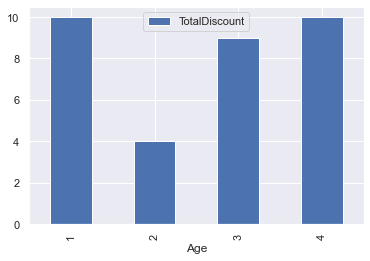

In [49]:
#2
result = disc[['Age','TotalDiscount']]
result.groupby('Age').count().plot(kind = 'bar')
plt.show()
# Klinik Cikarang Pusat memberikan diskon paling banyak
# Ini berbeda dengan tes kelmpok umur yang diberikan diskon paling besar (nominal)
# Dalam gambar ini akan diperlihatkan frekuensi diskon yang diberikan

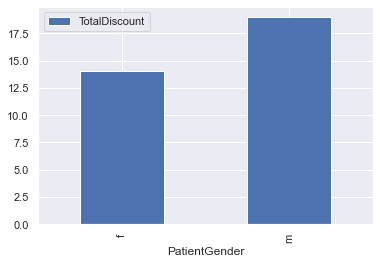

In [50]:
#3
result = disc[['PatientGender','TotalDiscount']]
result.groupby('PatientGender').count().plot(kind = 'bar')
plt.show()
#Dapat dilihat bahwa pasien laki-laki lebih banyak mendapatkan diskon

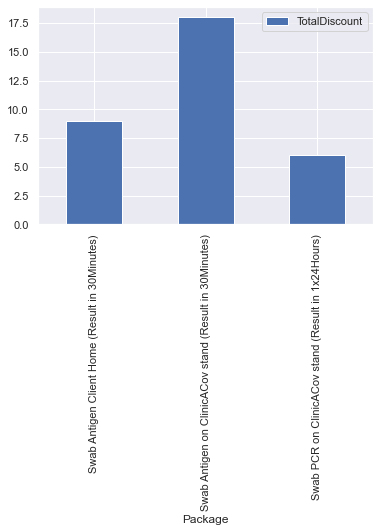

In [51]:
#4
result = disc[['Package','TotalDiscount']]
result.groupby('Package').count().plot(kind = 'bar')
plt.show()
# Paket Swab Antigen mendapatkan diskon paling banyak

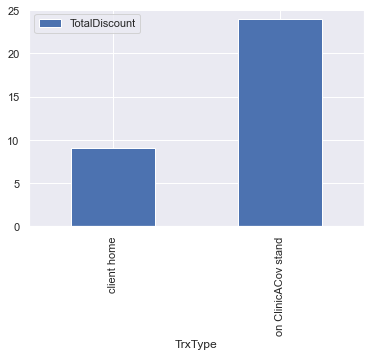

In [52]:
#5
result = disc[['TrxType','TotalDiscount']]
result.groupby('TrxType').count().plot(kind = 'bar')
plt.show()
# Tes yang langsung dilakukan diklinik memberikan diskon lebih banyak

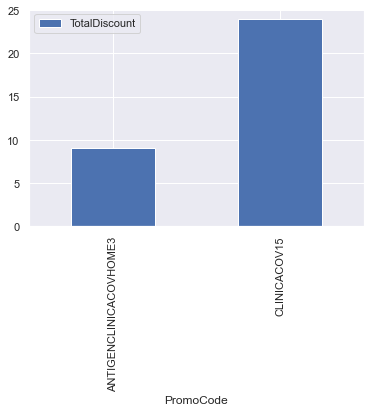

In [53]:
#6
result = disc[['PromoCode','TotalDiscount']]
result.groupby('PromoCode').count().plot(kind = 'bar')
plt.show()
# Kode promo CLINICACOV15 memberikan voucher diskon lebih banyak

### Feature Engineering

##### Akan dilakukan Encoding terhadap kolom-kolom kategorikal

In [54]:
# Melihat kembali kolom-kolom yang ada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   object        
 2   Branch            1000 non-null   object        
 3   Package           1000 non-null   object        
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   object        
 6   PromoCode         1000 non-null   object        
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   object        
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   object        
 13  Age               1000 non-null   object        
 14  month             1000 no

Berikut variabel-variabel yang akan dilakukan encoding:
1. TrxType
2. Branch
3. Package
4. PatientBirthDate
5. PatientGender
6. PromoCode
7. TotalDiscount
8. OrderCreated
9. MedicalResult
10. Age
14. Month

In [55]:
df.TotalDiscount.unique()

array(['0', '300000', '29850', '50000'], dtype=object)

Akan Dibagi level tes dari yang paling murah hingga paling mahal.
1. 0: Antigen Stand
2. 1: Antigen Home
3. 2: PCR Home
4. 3: PCR Stand

df.Package.unique()

antigen_stand = df[df['Package'] == 'Swab Antigen on ClinicACov stand (Result in 30Minutes)']['GrandTotal']
pcr_stand = df[df['Package'] == 'Swab PCR on ClinicACov stand (Result in 1x24Hours)']['GrandTotal']
pcr_home = df[df['Package'] == 'Swab PCR Client Home (Result in D+1)']['GrandTotal']
antigen_home = df[df['Package'] == 'Swab Antigen Client Home (Result in 30Minutes)']['GrandTotal']
print(f'antigen stand {antigen_stand.mean()}')
print(f'pcr stand {pcr_stand.mean()}')
print(f'pcr home {pcr_home.mean()}')
print(f'antigen home {antigen_home.mean()}')

disc_ = {'Swab Antigen on ClinicACov stand (Result in 30Minutes)': 0, 
         'Swab Antigen Client Home (Result in 30Minutes)': 1, 
         'Swab PCR Client Home (Result in D+1)': 2, 
         'Swab PCR on ClinicACov stand (Result in 1x24Hours)': 3}
for i in df:
    df['Package'] = df['Package'].replace(disc_.keys(), disc_.values())

df.Package.value_counts()

In [56]:
# # rekategori kolom TotalDiscount (konversi):
    #1. 0 : 0
    #2. 1 : 29850
    #3. 2 : 50000
    #4. 3 : 300000
disc_ = { '0': 0, '29850': 1, '50000': 2, '300000': 3}
for i in df:
    df['TotalDiscount'] = df['TotalDiscount'].replace(disc_.keys(), disc_.values())

In [57]:
# Mengubah terlebih dahulu kolom 'month' menjadi tipe objek
df['month'] = df['month'].astype(str)

In [58]:
# Melakukan Encoding untuk tipe object
for i in df.select_dtypes(include='object'):
    df[i] = df[i].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   int8          
 2   Branch            1000 non-null   int8          
 3   Package           1000 non-null   int8          
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   int8          
 6   PromoCode         1000 non-null   int8          
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   int64         
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   int8          
 13  Age               1000 non-null   int8          
 14  month             1000 no

In [59]:
# Melakukan Encoding untuk tipe datetime
for i in df.select_dtypes(include='datetime'):
    df[i] = df[i].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   TrxNumber         1000 non-null   int64
 1   TrxType           1000 non-null   int8 
 2   Branch            1000 non-null   int8 
 3   Package           1000 non-null   int8 
 4   PatientBirthDate  1000 non-null   int16
 5   PatientGender     1000 non-null   int8 
 6   PromoCode         1000 non-null   int8 
 7   GrandTotal        1000 non-null   int64
 8   TotalDiscount     1000 non-null   int64
 9   AdminFee          1000 non-null   int64
 10  TotalAmount       1000 non-null   int64
 11  OrderCreated      1000 non-null   int16
 12  MedicalResult     1000 non-null   int8 
 13  Age               1000 non-null   int8 
 14  month             1000 non-null   int8 
 15  date              1000 non-null   int64
dtypes: int16(2), int64(6), int8(8)
memory usage: 58.7 KB


### Korelasi
Bertujuan untuk melihat hubungan antar variabel dan dapat membantu pemilihan fitur saat pembentukan model (Modeling)

In [60]:
df.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,...,TotalAmount,OrderCreated,MedicalResult,Age,month,date
0,1389414778136428544,1,4,1,294,0,...,202000,13,0,2,1,4
1,1389414778136428544,1,4,1,294,0,...,202000,13,0,2,1,4
2,1389442470126813184,1,4,1,302,1,...,202000,17,0,2,1,4
3,1389442470126813184,1,4,1,302,1,...,202000,17,1,2,1,4
4,1389589423187820544,1,4,1,177,0,...,201850,22,0,3,1,4


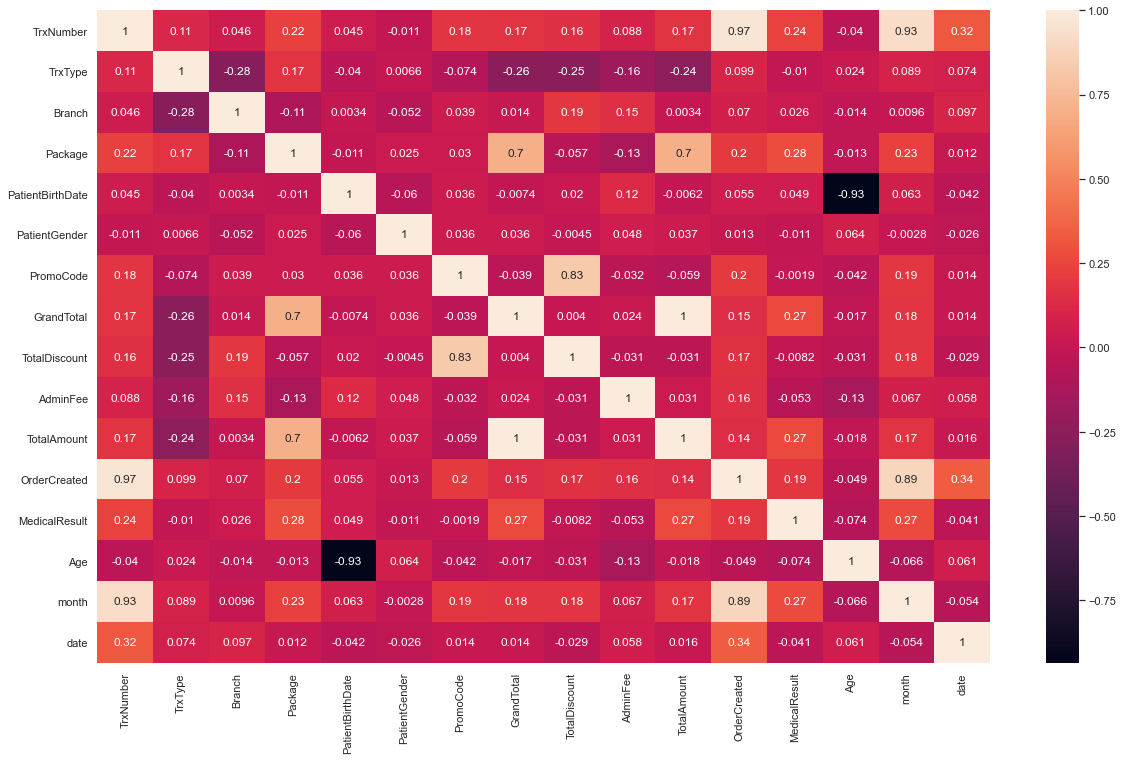

In [61]:
# Korelasi setelah encoding
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [62]:
# Korelasi tiap variabel dengan Grand Total
df.corr()["GrandTotal"].sort_values(ascending=False)

GrandTotal          1.000000
TotalAmount         0.999179
Package             0.699015
MedicalResult       0.265830
month               0.176501
TrxNumber           0.173031
OrderCreated        0.146004
PatientGender       0.035768
AdminFee            0.024201
Branch              0.014207
date                0.013540
TotalDiscount       0.003978
PatientBirthDate   -0.007387
Age                -0.016643
PromoCode          -0.039333
TrxType            -0.255295
Name: GrandTotal, dtype: float64

In [63]:
# Korelasi tiap variabel dengan Total Discount
df.corr()["TotalDiscount"].sort_values(ascending=False)

TotalDiscount       1.000000
PromoCode           0.831626
Branch              0.190402
month               0.180366
OrderCreated        0.166519
TrxNumber           0.160590
PatientBirthDate    0.020455
GrandTotal          0.003978
PatientGender      -0.004498
MedicalResult      -0.008240
date               -0.029420
Age                -0.030575
TotalAmount        -0.030934
AdminFee           -0.031039
Package            -0.057160
TrxType            -0.254212
Name: TotalDiscount, dtype: float64

<AxesSubplot:>

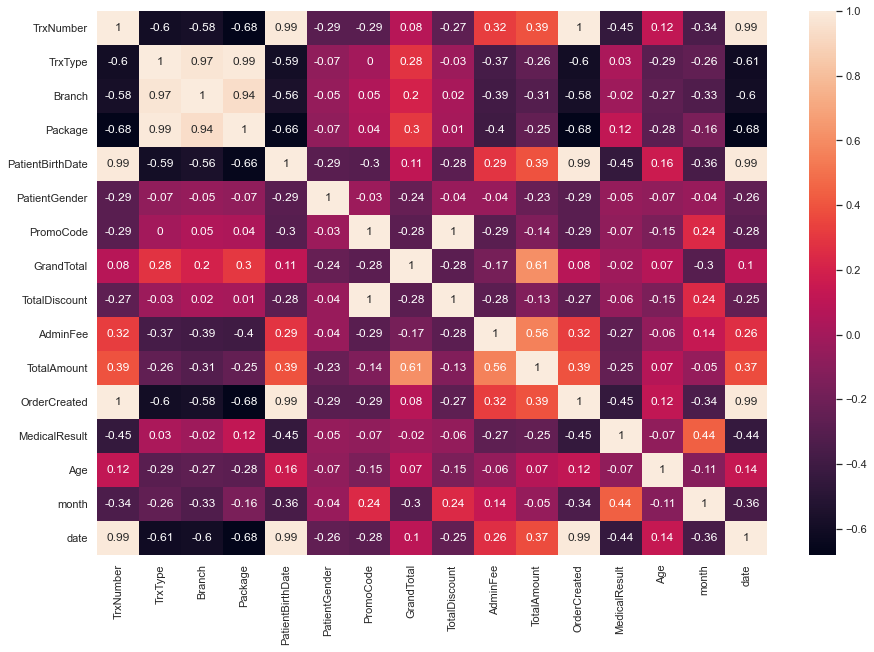

In [64]:
# Korelasi yang diajarkan kak Hafiz
corr_ = df.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(np.round(corr_.corr(),2), annot=True)

### Variabel terpilih untuk Modeling GrandTotal
        Berdasarkan correlation dan EDA yang dilakukan, kolom yang akan digunakan adalah  :
        1. TrxType ==> Tipe transaksi yang dilakukan.
        2. Branch ==> Klinik tempat melakukan tes.
        3. Package ==> Paket tes yang diambil.
        4. PatientGender ==> Jenis kelamin pasien.
        5. OrderCreated ==> Kapan terjadi transaksi tes.
        6. Age ==> Umur Pasien.
        7. Month ==> Bulan tes dilakukan.
        8. Date ==> Tanggal/Hari tes dilakukan.
        9. TARGET VARIABLE (Y) ==> Grand Total

### Variabel terpilih untuk Modeling Discount yang akan diberikan
        Berdasarkan correlation dan EDA yang dilakukan, kolom yang akan digunakan adalah  :
        1. TrxType ==> Tipe transaksi yang dilakukan.
        2. Branch ==> Klinik tempat melakukan tes.
        3. Package ==> Paket tes yang diambil.
        4. PatientGender ==> Jenis kelamin pasien.
        5. OrderCreated ==> Kapan terjadi transaksi tes.
        6. Age ==> Umur Pasien.
        7. Month ==> Bulan tes dilakukan.
        8. TARGET VARIABLE (Y) ==> TotalDiscount
        note:
        0 : 0
        1 : 29850
        2 : 50000
        3 : 300000

In [65]:
# Membuat dataframe untuk modeling Grand Total dan Total Discount
td = df[['TrxType','Branch','Package','PatientGender',
         'OrderCreated','Age','month','TotalDiscount']]
gt = df[['TrxType','Branch','Package','PatientGender',
         'OrderCreated','Age','month','GrandTotal','date']]

In [66]:
# Grand Total
gt.head()

,TrxType,Branch,Package,PatientGender,OrderCreated,Age,month,GrandTotal,date
0,1,4,1,0,13,2,1,199000,4
1,1,4,1,0,13,2,1,199000,4
2,1,4,1,1,17,2,1,199000,4
3,1,4,1,1,17,2,1,199000,4
4,1,4,1,0,22,3,1,199000,4


In [67]:
# Total Discount
td.head()

,TrxType,Branch,Package,PatientGender,OrderCreated,Age,month,TotalDiscount
0,1,4,1,0,13,2,1,0
1,1,4,1,0,13,2,1,0
2,1,4,1,1,17,2,1,0
3,1,4,1,1,17,2,1,0
4,1,4,1,0,22,3,1,0


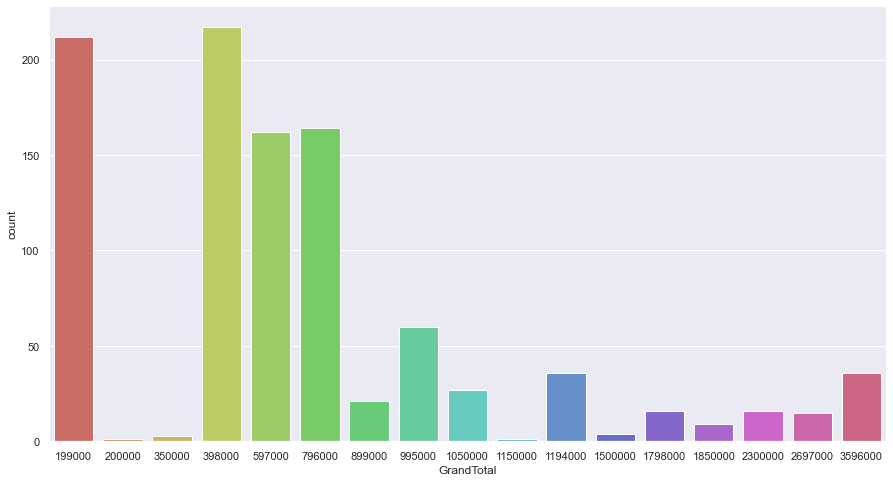

In [68]:
# Melihat proporsi variabel target untuk gt
plt.figure(figsize=(15,8))
fig = sns.countplot(x=gt["GrandTotal"],palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

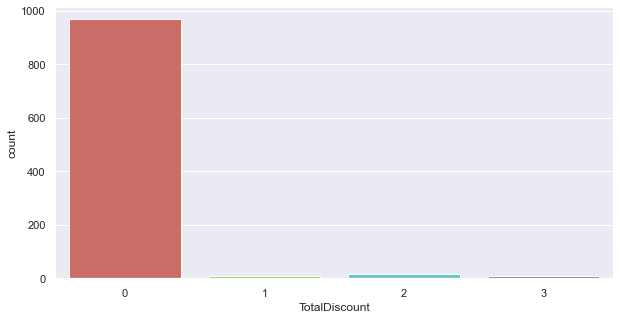

In [69]:
# Melihat proporsi variabel target untuk td
plt.figure(figsize=(10,5))
fig = sns.countplot(x=td["TotalDiscount"],palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

**Melakukan One Hot Encoding untuk kolom 'PatientGender' karena tidak ordinal**

In [70]:
gt = pd.get_dummies(data=gt,columns=["PatientGender"],prefix_sep="_")
td = pd.get_dummies(data=td,columns=["PatientGender"],prefix_sep="_")

In [71]:
gt.head()

,TrxType,Branch,Package,OrderCreated,Age,month,GrandTotal,date,PatientGender_0,PatientGender_1
0,1,4,1,13,2,1,199000,4,1,0
1,1,4,1,13,2,1,199000,4,1,0
2,1,4,1,17,2,1,199000,4,0,1
3,1,4,1,17,2,1,199000,4,0,1
4,1,4,1,22,3,1,199000,4,1,0


In [72]:
td.head()

,TrxType,Branch,Package,OrderCreated,Age,month,TotalDiscount,PatientGender_0,PatientGender_1
0,1,4,1,13,2,1,0,1,0
1,1,4,1,13,2,1,0,1,0
2,1,4,1,17,2,1,0,0,1
3,1,4,1,17,2,1,0,0,1
4,1,4,1,22,3,1,0,1,0


# Modeling

In [73]:
# Memanggil package untuk modeling
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,mean_squared_error,r2_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBRegressor

# Total Discount Model

In [204]:
x = td.drop(columns=["TotalDiscount"])
y = td["TotalDiscount"]

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [205]:
# SCALER ==> digunakan untuk dataset dengan magnitude yang berbeda
SS = StandardScaler()
x_train_SS = SS.fit_transform(x_train)
x_test_SS = SS.fit_transform(x_test)

x_train_scaled = SS.fit_transform(x_train)
x_test_scaled = SS.fit_transform(x_test)

### Algorithms
1. Logistic Regression
2. SVM
3. Random Forest

### Logistic Regression

In [76]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_train = lr.predict(x_train)
y_lr_test = lr.predict(x_test)
acc_lr_train = accuracy_score(y_train,y_lr_train)
acc_lr_test = accuracy_score(y_test,y_lr_test)
f1_lr_train = f1_score(y_train,y_lr_train,average="macro")
f1_lr_test = f1_score(y_test,y_lr_test,average="macro")

status_lr = []

In [77]:
print(f"Nilai Akurasi Logistic Regression : \n train : {acc_lr_train} \n test : {acc_lr_test} ")
if (acc_lr_train-acc_lr_test) > 0.03 :
    print("Overfitting")
    status_lr.append("Overfitting")
elif (acc_lr_train-acc_lr_test) < -0.03 :
    print("UnderFitting") 
    status_lr.append("Underfitting")
else :
    print("Just Right")
    status_lr.append("Just Right")

Nilai Akurasi Logistic Regression : 
 train : 0.97375 
 test : 0.96 
Just Right


In [78]:
print(f"Nilai F1 Score Logistic Regression : \n train : {f1_lr_train} \n test : {f1_lr_test} ")
if (f1_lr_train-f1_lr_test) > 0.03 :
    print("Overfitting")
    status_lr.append("Overfitting")
elif (f1_lr_train-f1_lr_test) < -0.03 :
    print("UnderFitting") 
    status_lr.append("Underfitting")
else :
    print("Just Right")
    status_lr.append("Just Right")

Nilai F1 Score Logistic Regression : 
 train : 0.47741887978007946 
 test : 0.24489795918367346 
Overfitting


##### Scaled Logistic Regression

In [79]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_lr_train_scaled = lr.predict(x_train_scaled)
y_lr_test_scaled = lr.predict(x_test_scaled)
acc_lr_train_scaled = accuracy_score(y_train,y_lr_train_scaled)
acc_lr_test_scaled = accuracy_score(y_test,y_lr_test_scaled)
f1_lr_train_scaled = f1_score(y_train,y_lr_train_scaled,average="macro")
f1_lr_test_scaled = f1_score(y_test,y_lr_test_scaled,average="macro")

status_lr = []

In [80]:
print(f"Nilai Akurasi Scaled Logistic Regression : \n train : {acc_lr_train_scaled} \n test : {acc_lr_test_scaled} ")
if (acc_lr_train_scaled-acc_lr_test_scaled) > 0.03 :
    print("Overfitting")
    status_lr.append("Overfitting")
elif (acc_lr_train_scaled-acc_lr_test_scaled) < -0.03 :
    print("UnderFitting") 
    status_lr.append("Underfitting")
else :
    print("Just Right")
    status_lr.append("Just Right")

Nilai Akurasi Scaled Logistic Regression : 
 train : 0.97625 
 test : 0.975 
Just Right


In [81]:
print(f"Nilai F1-Score Scaled Logistic Regression : \n train : {f1_lr_train_scaled} \n test : {f1_lr_test_scaled} ")
if (f1_lr_train_scaled-f1_lr_test_scaled) > 0.03 :
    print("Overfitting")
    status_lr.append("Overfitting")
elif (f1_lr_train_scaled-f1_lr_test_scaled) < -0.03 :
    print("UnderFitting") 
    status_lr.append("Underfitting")
else :
    print("Just Right")
    status_lr.append("Just Right")

Nilai F1-Score Scaled Logistic Regression : 
 train : 0.4969687300574346 
 test : 0.4968030690537084 
Just Right


### Support Vector Machine

In [82]:
svm = SVC()
svm.fit(x_train,y_train)
y_svm_train = svm.predict(x_train)
y_svm_test = svm.predict(x_test)
acc_svm_train = accuracy_score(y_train,y_svm_train)
acc_svm_test = accuracy_score(y_test,y_svm_test)
f1_svm_train = f1_score(y_train,y_svm_train,average="macro")
f1_svm_test = f1_score(y_test,y_svm_test,average="macro")

status_svm = []

In [83]:
print(f"Nilai Akurasi SVM : \n train : {acc_svm_train} \n test : {acc_svm_test} ")
if (acc_svm_train-acc_svm_test) > 0.03 :
    print("Overfitting")
    status_svm.append("Overfitting")
elif (acc_svm_train-acc_svm_test) < -0.03 :
    print("UnderFitting") 
    status_svm.append("Underfitting")
else :
    print("Just Right")
    status_svm.append("Just Right")

Nilai Akurasi SVM : 
 train : 0.9675 
 test : 0.965 
Just Right


In [84]:
print(f"Nilai F1-Score SVM : \n train : {f1_svm_train} \n test : {f1_svm_test} ")
if (f1_svm_train-f1_svm_test) > 0.03 :
    print("Overfitting")
    status_svm.append("Overfitting")
elif (f1_svm_train-f1_svm_test) < -0.03 :
    print("UnderFitting") 
    status_svm.append("Underfitting")
else :
    print("Just Right")
    status_svm.append("Just Right")

Nilai F1-Score SVM : 
 train : 0.24587039390088947 
 test : 0.2455470737913486 
Just Right


##### Scaled SVM

In [85]:
svm = SVC()
svm.fit(x_train_scaled,y_train)
y_svm_train_scaled = svm.predict(x_train_scaled)
y_svm_test_scaled = svm.predict(x_test_scaled)
acc_svm_train_scaled = accuracy_score(y_train,y_svm_train_scaled)
acc_svm_test_scaled = accuracy_score(y_test,y_svm_test_scaled)
f1_svm_train_scaled = f1_score(y_train,y_svm_train_scaled,average="macro")
f1_svm_test_scaled = f1_score(y_test,y_svm_test_scaled,average="macro")

status_svm = []

In [86]:
print(f"Nilai Akurasi Scaled SVM : \n train : {acc_svm_train_scaled} \n test : {acc_svm_test_scaled} ")
if (acc_svm_train_scaled-acc_svm_test_scaled) > 0.03 :
    print("Overfitting")
    status_svm.append("Overfitting")
elif (acc_svm_train_scaled-acc_svm_test_scaled) < -0.03 :
    print("UnderFitting") 
    status_svm.append("Underfitting")
else :
    print("Just Right")
    status_svm.append("Just Right")

Nilai Akurasi Scaled SVM : 
 train : 0.97625 
 test : 0.975 
Just Right


In [87]:
print(f"Nilai F1-Score Scaled SVM : \n train : {f1_svm_train_scaled} \n test : {f1_svm_test_scaled} ")
if (f1_svm_train_scaled-f1_svm_test_scaled) > 0.03 :
    print("Overfitting")
    status_svm.append("Overfitting")
elif (f1_svm_train_scaled-f1_svm_test_scaled) < -0.03 :
    print("UnderFitting") 
    status_svm.append("Underfitting")
else :
    print("Just Right")
    status_svm.append("Just Right")

Nilai F1-Score Scaled SVM : 
 train : 0.4969687300574346 
 test : 0.4968030690537084 
Just Right


### Random Forest

In [206]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_rf_train = rf.predict(x_train)
y_rf_test = rf.predict(x_test)
acc_rf_train = accuracy_score(y_train,y_rf_train)
acc_rf_test = accuracy_score(y_test,y_rf_test)
f1_rf_train = f1_score(y_train,y_rf_train,average="macro")
f1_rf_test = f1_score(y_test,y_rf_test,average="macro")

status_rf = []

In [207]:
print(f"Nilai Akurasi Random Forest : \n train : {acc_rf_train} \n test : {acc_rf_test} ")
if (acc_rf_train-acc_rf_test) > 0.03 :
    print("Overfitting")
    status_rf.append("Overfitting")
elif (acc_rf_train-acc_rf_test) < -0.03 :
    print("UnderFitting") 
    status_rf.append("Underfitting")
else :
    print("Just Right")
    status_rf.append("Just Right")

Nilai Akurasi Random Forest : 
 train : 1.0 
 test : 1.0 
Just Right


In [208]:
print(f"Nilai F1-Score Random Forest : \n train : {f1_rf_train} \n test : {f1_rf_test} ")
if (f1_rf_train-f1_rf_test) > 0.03 :
    print("Overfitting")
    status_rf.append("Overfitting")
elif (f1_rf_train-f1_rf_test) < -0.03 :
    print("UnderFitting") 
    status_rf.append("Underfitting")
else :
    print("Just Right")
    status_rf.append("Just Right")

Nilai F1-Score Random Forest : 
 train : 1.0 
 test : 1.0 
Just Right


##### Scaled Random Forest

In [220]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_rf_train_scaled = rf.predict(x_train_scaled)
y_rf_test_scaled = rf.predict(x_test_scaled)
acc_rf_train_scaled = accuracy_score(y_train,y_rf_train_scaled)
acc_rf_test_scaled = accuracy_score(y_test,y_rf_test_scaled)
f1_rf_train_scaled = f1_score(y_train,y_rf_train_scaled,average="macro")
f1_rf_test_scaled = f1_score(y_test,y_rf_test_scaled,average="macro")

status_rf = []

In [216]:
print(f"Nilai Akurasi Scaled Random Forest : \n train : {acc_rf_train_scaled} \n test : {acc_rf_test_scaled} ")
if (acc_rf_train_scaled-acc_rf_test_scaled) > 0.03 :
    print("Overfitting")
    status_rf.append("Overfitting")
elif (acc_rf_train_scaled-acc_rf_test_scaled) < -0.03 :
    print("UnderFitting") 
    status_rf.append("Underfitting")
else :
    print("Just Right")
    status_rf.append("Just Right")

Nilai Akurasi Scaled Random Forest : 
 train : 1.0 
 test : 0.985 
Just Right


In [221]:
print(f"Nilai F1-Score Scaled Random Forest : \n train : {f1_rf_train_scaled} \n test : {f1_rf_test_scaled} ")
if (f1_rf_train_scaled-f1_rf_test_scaled) > 0.03 :
    print("Overfitting")
    status_rf.append("Overfitting")
elif (f1_rf_train_scaled-f1_rf_test_scaled) < -0.03 :
    print("UnderFitting") 
    status_rf.append("Underfitting")
else :
    print("Just Right")
    status_rf.append("Just Right")

Nilai F1-Score Scaled Random Forest : 
 train : 1.0 
 test : 0.6641025641025641 
Overfitting


### Confusion Matrix

##### Logistic Regression

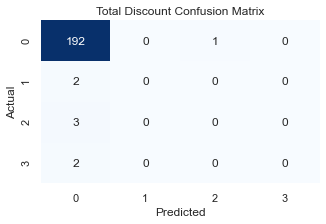

In [94]:
cm_td_lr = confusion_matrix(y_test,y_lr_test)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_td_lr, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Total Discount Confusion Matrix')
plt.show()

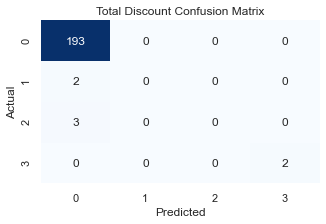

In [95]:
cm_td_lr_scaled = confusion_matrix(y_test,y_lr_test_scaled)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_td_lr_scaled, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Total Discount Confusion Matrix')
plt.show()

##### Support Vector Machine

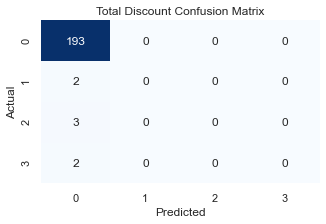

In [96]:
cm_td_svm = confusion_matrix(y_test,y_svm_test)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_td_svm, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Total Discount Confusion Matrix')
plt.show()

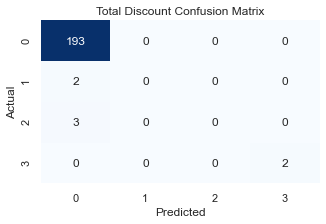

In [97]:
cm_td_svm_scaled = confusion_matrix(y_test,y_svm_test_scaled)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_td_svm_scaled, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Total Discount Confusion Matrix')
plt.show()

##### Random Forest

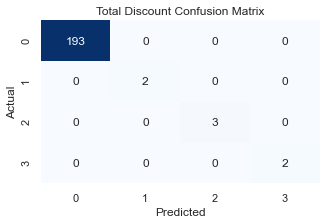

In [98]:
cm_td_rf = confusion_matrix(y_test,y_rf_test)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_td_rf, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Total Discount Confusion Matrix')
plt.show()

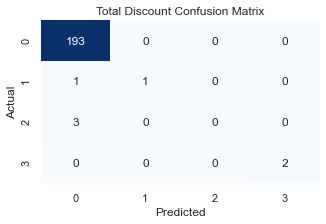

In [222]:
cm_td_rf_scaled = confusion_matrix(y_test,y_rf_test_scaled)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_td_rf_scaled, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Total Discount Confusion Matrix')
plt.show()

# Grand Total Model

In [100]:
x = gt.drop(columns=["GrandTotal"])
y = gt["GrandTotal"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=300)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 9), (200, 9), (800,), (200,))

In [101]:
x.columns

Index(['TrxType', 'Branch', 'Package', 'OrderCreated', 'Age', 'month', 'date',
       'PatientGender_0', 'PatientGender_1'],
      dtype='object')

###### Akan dilakukan Scaling untuk membentuk model prediksi Grand Total

In [102]:
SS = StandardScaler()
x_train_SS = SS.fit_transform(x_train)
x_test_SS = SS.fit_transform(x_test)

x_train_scaled = SS.fit_transform(x_train)
x_test_scaled = SS.fit_transform(x_test)

### Decision Tree for Base Learner

In [103]:
dt = DecisionTreeRegressor(criterion = 'mae', splitter = 'random')
dt.fit(x_train_scaled,y_train)
y_gt_dt_train = dt.predict(x_train_scaled)
y_gt_dt_test = dt.predict(x_test_scaled)
print(f'Train: {r2_score(y_train,y_gt_dt_train)}')
print(f'Test: {r2_score(y_test,y_gt_dt_test)}')
rmse = mean_squared_error(y_test,y_gt_dt_test, squared=False)
print(f'RMSE: {rmse}')
print(f'SI Score = (RMSE/average observed value)*100: {(rmse/y_test.mean())*100}')

Train: 0.9984893075708938
Test: 0.759445304964808
RMSE: 312909.5795912934
SI Score = (RMSE/average observed value)*100: 42.50911283674683


In [104]:
#Membuat dictionary untuk hyperparameter
#dt = DecisionTreeRegressor()
#dt_gs = {'random_state':np.arange(1,100),'criterion':['mae'], 'splitter':['random']}

#dt_gscv = GridSearchCV(dt, dt_gs, cv=10)

#dt_gscv.fit(x_train_scaled,y_train)

In [105]:
#print(dt_gscv.best_params_)
#print(dt_gscv.best_score_)

### Random Forest

In [106]:
rf = RandomForestRegressor(criterion='mae', random_state=4)
rf.fit(x_train_scaled,y_train)
y_gt_rf_test = rf.predict(x_test_scaled)
r2_score(y_test,y_gt_rf_test)
print(f'Test: {r2_score(y_test,y_gt_rf_test)}')
rmse = mean_squared_error(y_test,y_gt_rf_test, squared=False)
print(f'RMSE: {rmse}')
print(f'SI Score = (RMSE/average observed value)*100: {(rmse/y_test.mean())*100}')

Test: 0.8837685644821843
RMSE: 217507.25175956776
SI Score = (RMSE/average observed value)*100: 29.548600972635207


### Bagging Ensemble

In [107]:
bag = BaggingRegressor(base_estimator=dt, random_state=6, max_samples=.9)
bag.fit(x_train_scaled,y_train)
y_gt_bag_test = bag.predict(x_test_scaled)
r2_score(y_test,y_gt_bag_test)
print(f'Test: {r2_score(y_test,y_gt_bag_test)}')
rmse = mean_squared_error(y_test,y_gt_bag_test, squared=False)
print(f'RMSE: {rmse}')
print(f'Scatter Index = (RMSE/average observed value)*100: {(rmse/y_test.mean())*100}')

Test: 0.9007259685472941
RMSE: 201015.603250096
Scatter Index = (RMSE/average observed value)*100: 27.308192263292487


### Ada Boost (Boosting)

In [108]:
adb = AdaBoostRegressor(base_estimator=dt, random_state = 10)
adb.fit(x_train_scaled,y_train)
y_gt_adb_test = adb.predict(x_test_scaled)
r2_score(y_test,y_gt_adb_test)
print(f'Test: {r2_score(y_test,y_gt_adb_test)}')
rmse = mean_squared_error(y_test,y_gt_adb_test, squared=False)
print(f'RMSE: {rmse}')
print(f'Scatter Index = (RMSE/average observed value)*100: {(rmse/y_test.mean())*100}')

Test: 0.8984175815881978
RMSE: 203339.24854783938
Scatter Index = (RMSE/average observed value)*100: 27.62386204969968


**ARGUMEN**

<AxesSubplot:ylabel='GrandTotal'>

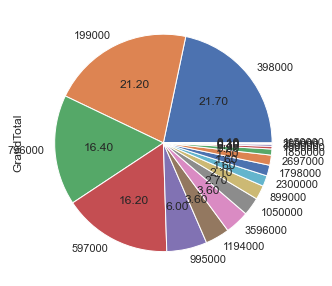

In [168]:

plt.figure(figsize=(10,5))
y.value_counts().plot.pie(autopct='%.2f')

Data yang dipakai untuk modeling adalah data yang imbalance, jadi akan dilakukan Random OverSampling untuk handling imbalance data

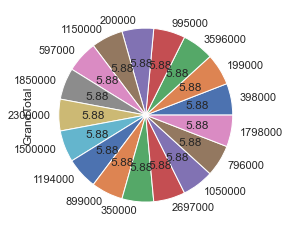

In [169]:
# Importing package
from imblearn.over_sampling import RandomOverSampler
# Oversampling method
ros = RandomOverSampler(sampling_strategy="not majority")
x_res,y_res = ros.fit_resample(x,y)

val = y_res.value_counts().plot.pie(autopct='%.2f')

### Modeling after Resample

In [170]:
x_res_train,x_res_test,y_res_train,y_res_test = train_test_split(x_res,y_res,test_size=.2,random_state=100)
x_res_train.shape,x_res_test.shape,y_res_train.shape,y_res_test.shape

((2951, 9), (738, 9), (2951,), (738,))

In [171]:
SS = StandardScaler()
x_res_train_SS = SS.fit_transform(x_res_train)
x_res_test_SS = SS.fit_transform(x_res_test)

x_res_train_scaled = SS.fit_transform(x_res_train)
x_res_test_scaled = SS.fit_transform(x_res_test)

##### Trying Decision Tree for Resampled Data

In [780]:
# Membuat model Decision Tree
dt = DecisionTreeRegressor(criterion = 'mae', splitter = 'random', random_state=10)
dt.fit(x_res_train_scaled,y_res_train)
y_res_gt_dt_train = dt.predict(x_res_train_scaled)
y_res_gt_dt_test = dt.predict(x_res_test_scaled)
print(f'Train: {r2_score(y_res_train,y_res_gt_dt_train)}')
print(f'Test: {r2_score(y_res_test,y_res_gt_dt_test)}')
rmse = mean_squared_error(y_res_test,y_res_gt_dt_test, squared=False)
print(f'RMSE: {rmse}')
print(f'Scatter Index Score = (RMSE/average observed value)*100: {(rmse/y_res_test.mean())*100}')

Train: 0.9991978692951614
Test: 0.9845368623939204
RMSE: 114424.70690430237
Scatter Index Score = (RMSE/average observed value)*100: 9.29570455732938


##### Trying Bagging for Resampled Data

In [564]:
bag = BaggingRegressor(base_estimator=dt, max_samples=.9)
bag.fit(x_res_train_scaled,y_res_train)
y_res_gt_bag_test = bag.predict(x_res_test_scaled)
r2_score(y_res_test,y_res_gt_bag_test)
print(f'Test: {r2_score(y_res_test,y_res_gt_bag_test)}')
rmse = mean_squared_error(y_res_test,y_res_gt_bag_test, squared=False)
print(f'RMSE: {rmse}')
print(f'Scatter Index = (RMSE/average observed value)*100: {(rmse/y_res_test.mean())*100}')

Test: 0.988050786306569
RMSE: 100586.72362787099
Scatter Index = (RMSE/average observed value)*100: 8.171525980105212
